In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

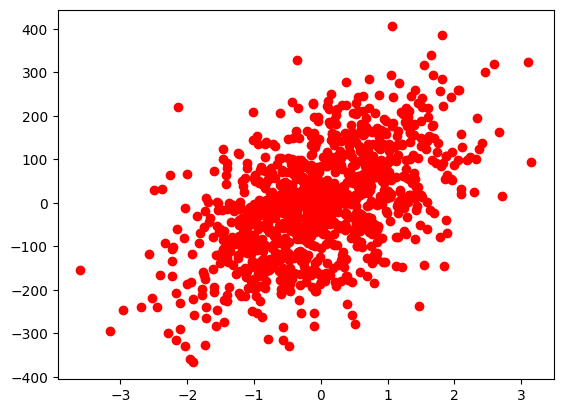

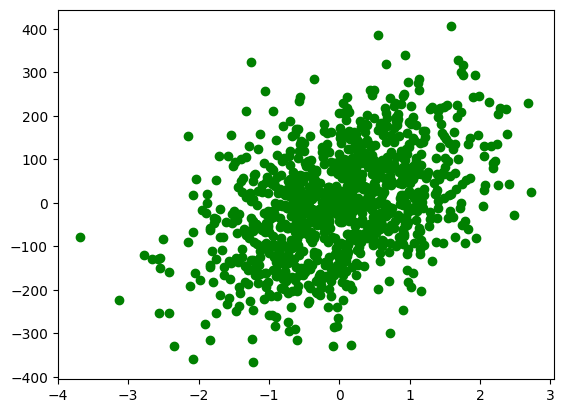

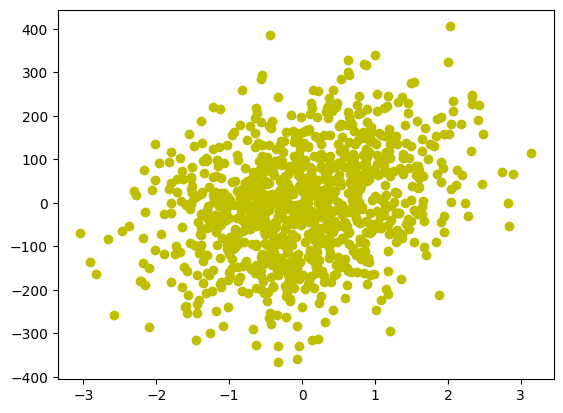

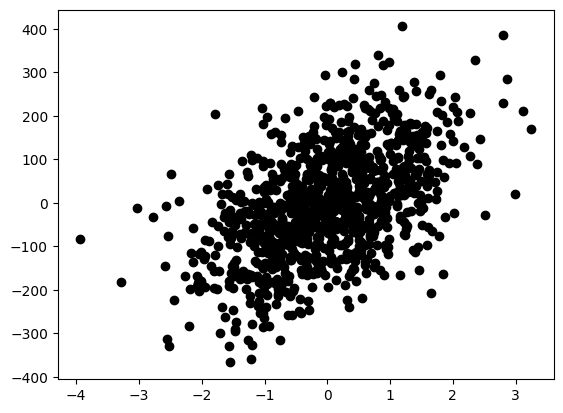

In [212]:
x, y = datasets.make_regression(n_samples=1000, n_features=4, n_informative=4, n_targets=1, noise=50)

df = pd.DataFrame(x, columns=['x_1', 'x_2', 'x_3', 'x_4'])
df['y'] = y

color = ['r', 'g', 'y', 'black']
for i, j in zip(range(x.shape[1]), color):
    plt.scatter(x[::, i], y, label=i, c=j)
    plt.show()

In [194]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[::, :-1], y, test_size=0.3, random_state=42)

In [195]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [196]:
model.score(X_test, y_test)

0.785355859347264

In [197]:
y_predict = model.predict(X_test)

In [198]:
print(f'mae: { np.mean(np.abs(y_test - y_predict ))}')

mae: 43.487559253396824


In [199]:
print(f'mae: {metrics.mean_absolute_error(y_test, y_predict)}')

mae: 43.487559253396824


-----------------

In [200]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [201]:
model_linear.score(X_test, y_test)

0.8235334699142385

In [202]:
y_predict_linear = model_linear.predict(X_test)

In [203]:
metrics.mean_absolute_error(y_test, y_predict_linear)

39.62862757670414

-----

In [3]:
from sympy import *
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=10, n_features=1, n_informative=1, n_targets=1, noise=0.3)

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_value = None

    def fit(self, X, y):
        # Инициализируем предсказание как среднее значение целевой переменной
        self.initial_value = np.mean(y)
        residuals = y - self.initial_value  # Начальные остатки (ошибки)
        
        for i in range(self.n_estimators):
            # Обучаем базовую модель (дерево решений)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            
            # Обновляем остатки (ошибки), уменьшая их с помощью обученной модели
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        # Начальное предсказание — это среднее значение целевой переменной
        y_pred = np.full(X.shape[0], self.initial_value)
        
        # Добавляем предсказания от всех моделей
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        
        return y_pred


# Пример использования:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error


    # Обучаем градиентный бустинг
    gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    gb.fit(x, y)

    # Предсказываем
    y_pred = gb.predict(x)

    # Оцениваем модель
    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.0000


In [205]:
metrics.mean_absolute_error(y_pred, y_test)

43.50907832884489

In [5]:
y_pred

array([-19.83891074,  -8.54087612,  -8.54087612,   8.0959063 ,
         8.0959063 ,  20.73642937,  -1.99091796,   9.93224839,
        21.96179709,   5.191355  ])

In [8]:
from sympy import *
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=10, n_features=1, n_informative=1, n_targets=1, noise=0.3)

display(x, y)

array([[ 1.83464524],
       [ 1.17811922],
       [ 1.98977526],
       [ 0.46093961],
       [-0.15750095],
       [ 2.08353851],
       [ 1.93685745],
       [-1.22458004],
       [ 1.12797936],
       [-0.10329996]])

array([ 56.76630844,  36.32456751,  61.17700689,  14.17082399,
        -4.84449242,  64.91756921,  60.43704632, -37.83183645,
        35.14874443,  -3.29689808])

----------------

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_regression

In [7]:
x, y = make_regression(n_samples=10, n_features=2, n_informative=2, n_targets=1, noise=0.3)

In [8]:
df = pd.DataFrame(x)
df['y_true'] = y
df

0         1      y_true
0  0.997417 -0.381379    5.289132
1  0.041346 -1.130808  -65.624356
2  1.412657 -0.740620   -4.257290
3 -0.259543 -2.053265 -128.341063
4  0.908096 -0.561525   -7.888115
5 -3.289167 -2.799286 -257.109054
6 -0.256808  2.233291  124.845272
7  1.572645 -1.234252  -29.233964
8  1.248811  0.565934   68.038817
9 -0.158513 -1.506559  -93.454477

In [9]:
df['y_pred_0'] = df['y_true'].mean()
df

0         1      y_true  y_pred_0
0  0.997417 -0.381379    5.289132 -38.77351
1  0.041346 -1.130808  -65.624356 -38.77351
2  1.412657 -0.740620   -4.257290 -38.77351
3 -0.259543 -2.053265 -128.341063 -38.77351
4  0.908096 -0.561525   -7.888115 -38.77351
5 -3.289167 -2.799286 -257.109054 -38.77351
6 -0.256808  2.233291  124.845272 -38.77351
7  1.572645 -1.234252  -29.233964 -38.77351
8  1.248811  0.565934   68.038817 -38.77351
9 -0.158513 -1.506559  -93.454477 -38.77351

In [10]:
metrics.mean_absolute_error(df['y_true'], df['y_pred_0'])

77.88698211898176

In [11]:
df['residual'] = df['y_true'] - df['y_pred_0']

In [12]:
df

0         1      y_true  y_pred_0    residual
0  0.997417 -0.381379    5.289132 -38.77351   44.062642
1  0.041346 -1.130808  -65.624356 -38.77351  -26.850846
2  1.412657 -0.740620   -4.257290 -38.77351   34.516219
3 -0.259543 -2.053265 -128.341063 -38.77351  -89.567553
4  0.908096 -0.561525   -7.888115 -38.77351   30.885395
5 -3.289167 -2.799286 -257.109054 -38.77351 -218.335544
6 -0.256808  2.233291  124.845272 -38.77351  163.618782
7  1.572645 -1.234252  -29.233964 -38.77351    9.539546
8  1.248811  0.565934   68.038817 -38.77351  106.812327
9 -0.158513 -1.506559  -93.454477 -38.77351  -54.680968

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[[0, 1]], df['residual'])

DecisionTreeRegressor(max_depth=1)

In [27]:
df['tree_pred_1'] = tree_1.predict(df[[0, 1]])

df

0         1      y_true   y_pred_0    residual  tree_pred_1
0  1.180225  0.958140  125.291828  29.743904   95.547924    31.388709
1 -0.156056 -0.628002  -58.524662  29.743904  -88.268565  -125.554836
2 -0.919774  0.714357   23.974118  29.743904   -5.769785    31.388709
3 -0.255252  0.861548   62.173504  29.743904   32.429600    31.388709
4  0.222990  0.587267   57.276049  29.743904   27.532145    31.388709
5  0.975458  0.097715   45.968617  29.743904   16.224713    31.388709
6  2.340270 -0.556272   44.291373  29.743904   14.547469    31.388709
7  1.207611  0.238348   66.417602  29.743904   36.673698    31.388709
8 -0.178135  0.840640   63.667810  29.743904   33.923907    31.388709
9  0.455106 -1.810588 -133.097203  29.743904 -162.841106  -125.554836

[Text(0.5, 0.75, 'x[1] <= -0.592\nsquared_error = 4825.162\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 1390.266\nsamples = 2\nvalue = -125.555'),
 Text(0.75, 0.25, 'squared_error = 757.631\nsamples = 8\nvalue = 31.389')]

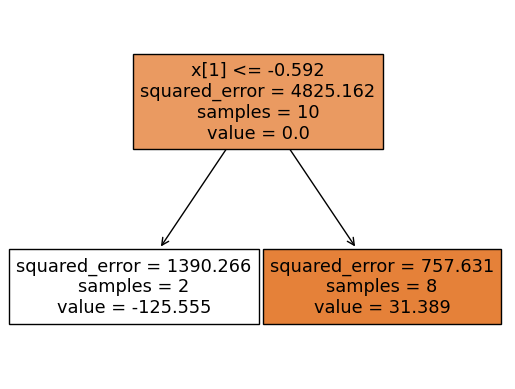

In [29]:
from sklearn.tree import plot_tree

plot_tree(tree_1, filled=True)

In [30]:
nu = 0.1

df['y_pred_1'] = df['y_pred_0'] + nu * df['tree_pred_1']
df

0         1      y_true   y_pred_0    residual  tree_pred_1  \
0  1.180225  0.958140  125.291828  29.743904   95.547924    31.388709   
1 -0.156056 -0.628002  -58.524662  29.743904  -88.268565  -125.554836   
2 -0.919774  0.714357   23.974118  29.743904   -5.769785    31.388709   
3 -0.255252  0.861548   62.173504  29.743904   32.429600    31.388709   
4  0.222990  0.587267   57.276049  29.743904   27.532145    31.388709   
5  0.975458  0.097715   45.968617  29.743904   16.224713    31.388709   
6  2.340270 -0.556272   44.291373  29.743904   14.547469    31.388709   
7  1.207611  0.238348   66.417602  29.743904   36.673698    31.388709   
8 -0.178135  0.840640   63.667810  29.743904   33.923907    31.388709   
9  0.455106 -1.810588 -133.097203  29.743904 -162.841106  -125.554836   

    y_pred_1  
0  32.882775  
1  17.188420  
2  32.882775  
3  32.882775  
4  32.882775  
5  32.882775  
6  32.882775  
7  32.882775  
8  32.882775  
9  17.188420

In [32]:
metrics.mean_absolute_error(df['y_true'], df['y_pred_0'])

51.37589139222998

In [33]:
metrics.mean_absolute_error(df['y_true'], df['y_pred_1'])

46.98147213989445

In [34]:
df

0         1      y_true   y_pred_0    residual  tree_pred_1  \
0  1.180225  0.958140  125.291828  29.743904   95.547924    31.388709   
1 -0.156056 -0.628002  -58.524662  29.743904  -88.268565  -125.554836   
2 -0.919774  0.714357   23.974118  29.743904   -5.769785    31.388709   
3 -0.255252  0.861548   62.173504  29.743904   32.429600    31.388709   
4  0.222990  0.587267   57.276049  29.743904   27.532145    31.388709   
5  0.975458  0.097715   45.968617  29.743904   16.224713    31.388709   
6  2.340270 -0.556272   44.291373  29.743904   14.547469    31.388709   
7  1.207611  0.238348   66.417602  29.743904   36.673698    31.388709   
8 -0.178135  0.840640   63.667810  29.743904   33.923907    31.388709   
9  0.455106 -1.810588 -133.097203  29.743904 -162.841106  -125.554836   

    y_pred_1  
0  32.882775  
1  17.188420  
2  32.882775  
3  32.882775  
4  32.882775  
5  32.882775  
6  32.882775  
7  32.882775  
8  32.882775  
9  17.188420

In [35]:
df['residual_1'] = df['y_true'] - df['y_pred_1']
df

0         1      y_true   y_pred_0    residual  tree_pred_1  \
0  1.180225  0.958140  125.291828  29.743904   95.547924    31.388709   
1 -0.156056 -0.628002  -58.524662  29.743904  -88.268565  -125.554836   
2 -0.919774  0.714357   23.974118  29.743904   -5.769785    31.388709   
3 -0.255252  0.861548   62.173504  29.743904   32.429600    31.388709   
4  0.222990  0.587267   57.276049  29.743904   27.532145    31.388709   
5  0.975458  0.097715   45.968617  29.743904   16.224713    31.388709   
6  2.340270 -0.556272   44.291373  29.743904   14.547469    31.388709   
7  1.207611  0.238348   66.417602  29.743904   36.673698    31.388709   
8 -0.178135  0.840640   63.667810  29.743904   33.923907    31.388709   
9  0.455106 -1.810588 -133.097203  29.743904 -162.841106  -125.554836   

    y_pred_1  residual_1  
0  32.882775   92.409054  
1  17.188420  -75.713082  
2  32.882775   -8.908656  
3  32.882775   29.290729  
4  32.882775   24.393274  
5  32.882775   13.085842  
6  32.882775   11.408599  
7  32.882775   33.534827  
8  32.882775   30.785036  
9  17.188420 -150.285623

In [36]:
tree_2 = DecisionTreeRegressor(max_depth=1)
tree_2.fit(df[[0, 1]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [37]:
df['y_pred_2'] = df['y_pred_1'] + nu * tree_2.predict(df[[0, 1]])

In [38]:
df

0         1      y_true   y_pred_0    residual  tree_pred_1  \
0  1.180225  0.958140  125.291828  29.743904   95.547924    31.388709   
1 -0.156056 -0.628002  -58.524662  29.743904  -88.268565  -125.554836   
2 -0.919774  0.714357   23.974118  29.743904   -5.769785    31.388709   
3 -0.255252  0.861548   62.173504  29.743904   32.429600    31.388709   
4  0.222990  0.587267   57.276049  29.743904   27.532145    31.388709   
5  0.975458  0.097715   45.968617  29.743904   16.224713    31.388709   
6  2.340270 -0.556272   44.291373  29.743904   14.547469    31.388709   
7  1.207611  0.238348   66.417602  29.743904   36.673698    31.388709   
8 -0.178135  0.840640   63.667810  29.743904   33.923907    31.388709   
9  0.455106 -1.810588 -133.097203  29.743904 -162.841106  -125.554836   

    y_pred_1  residual_1   y_pred_2  
0  32.882775   92.409054  35.707758  
1  17.188420  -75.713082   5.888485  
2  32.882775   -8.908656  35.707758  
3  32.882775   29.290729  35.707758  
4  32.882775   24.393274  35.707758  
5  32.882775   13.085842  35.707758  
6  32.882775   11.408599  35.707758  
7  32.882775   33.534827  35.707758  
8  32.882775   30.785036  35.707758  
9  17.188420 -150.285623   5.888485

In [40]:
metrics.mean_absolute_error(df['y_true'], df['y_pred_1'])

46.98147213989445

In [41]:
metrics.mean_absolute_error(df['y_true'], df['y_pred_2'])

43.02649481279248

In [14]:
df = df[[0, 1, 'y_true']].copy()

In [15]:
df

0         1      y_true
0  0.997417 -0.381379    5.289132
1  0.041346 -1.130808  -65.624356
2  1.412657 -0.740620   -4.257290
3 -0.259543 -2.053265 -128.341063
4  0.908096 -0.561525   -7.888115
5 -3.289167 -2.799286 -257.109054
6 -0.256808  2.233291  124.845272
7  1.572645 -1.234252  -29.233964
8  1.248811  0.565934   68.038817
9 -0.158513 -1.506559  -93.454477

In [23]:
n = 100
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    df['residual'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0, 1]], df['residual'])
    df['y_pred'] += nu * tree.predict(df[[0, 1]])
    trees.append(tree)
    
    if i % 100 == 0:
        print(metrics.mean_absolute_error(df['y_true'], df['y_pred']))
    

71.67125529943581


In [26]:
metrics.mean_absolute_error(df['y_true'], df['y_pred'])

3.2698361199641672

In [18]:
test = df[[0, 1]].copy()

In [19]:
test['y_pred'] = df['y_true'].mean()

In [20]:
for tree in trees:
    test['y_pred'] += nu * tree.predict(df[[0, 1]])

In [21]:
test

0         1      y_pred
0  0.997417 -0.381379    4.802769
1  0.041346 -1.130808  -53.196351
2  1.412657 -0.740620   -4.977611
3 -0.259543 -2.053265 -130.546565
4  0.908096 -0.561525   -8.130996
5 -3.289167 -2.799286 -253.187878
6 -0.256808  2.233291  121.080670
7  1.572645 -1.234252  -33.239785
8  1.248811  0.565934   66.950279
9 -0.158513 -1.506559  -97.289628

In [22]:
y_pred

array([-19.83891074,  -8.54087612,  -8.54087612,   8.0959063 ,
         8.0959063 ,  20.73642937,  -1.99091796,   9.93224839,
        21.96179709,   5.191355  ])

In [50]:
from sympy import *

In [51]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [52]:
1/2 * (y_true - y_pred)**2

0.5*(-y_pred + y_true)**2

In [53]:
diff(1/2 * (y_true - y_pred)**2, y_pred)

1.0*y_pred - 1.0*y_true

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from scipy.special import expit  # Сигмоида

class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_value = None

    def fit(self, X, y):
        # Инициализируем предсказание как log-odds начальной вероятности
        prob = np.mean(y)
        self.initial_value = np.log(prob / (1 - prob))  # log-odds
        y_pred = np.full(y.shape, self.initial_value)

        for i in range(self.n_estimators):
            # Вычисляем псевдо-остатки (gradients)
            residuals = y - expit(y_pred)  # expit — это сигмоида, т.е. p = 1 / (1 + exp(-y_pred))

            # Обучаем базовую модель на псевдо-остатках
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)

            # Обновляем предсказания с учетом текущей модели
            y_pred += self.learning_rate * tree.predict(X)

    def predict_proba(self, X):
        # Начальное предсказание — это log-odds
        y_pred = np.full(X.shape[0], self.initial_value)

        # Добавляем предсказания от всех моделей
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)

        # Преобразуем log-odds в вероятности с помощью сигмоиды
        return expit(y_pred)

    def predict(self, X):
        # Преобразуем вероятности в классы (0 или 1)
        return (self.predict_proba(X) >= 0.5).astype(int)


# Пример использования:
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Генерируем случайные данные для классификации
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

    # Разделяем на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучаем градиентный бустинг для классификации
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    gbc.fit(X_train, y_train)

    # Предсказываем метки классов
    y_pred = gbc.predict(X_test)

    # Оцениваем модель
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9100
